In [1]:
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import arviz as az

from ipywidgets import interact
import ipywidgets as ipyw

In [2]:
az.style.use('arviz-whitegrid')

In [3]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


body {
  font-family: Ubuntu;
  background: #F0F0F0;
  background-color: #F0F0F0;
}


.reveal h1,
.reveal h2,
.reveal h3,
.reveal h4,
.reveal h5,
.reveal h6 {
  margin: 0 0 20px 0;
  color: #2a2eec;
  font-family: Ubuntu;
  line-height: 0.9em;
  letter-spacing: 0.02em;
  text-transform: none;
  text-shadow: none;
}

.reveal blockquote {
  display: block;
  position: relative;
  background: #fa7c17;
  border-radius: 15px;
  box-shadow: 0px 0px 2px rgba(0, 0, 0, 0.2);
  font-weight: bold;
}

</style>

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/osvaldo/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "serif",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "controls": "True",
              "progress": "False",
              "shortcut": "False",});


<center><img src="img/logo_inst.png" width="750">
<br>
<br>
<br>
<br>
<h1 align="center">Introduction to Bayesian Inference</h1>



<br>
<br>
<br>
<br>
<br>

## Aims

* Gain a very general understanding of probability concepts
* Understand Bayes' Theorem
* Understand posterior distributions

## Bayesian modeling

<br>

* Statistics is a form of modeling


* A statistical model generates data


* A Bayesian model meets two requirements:
    1. Unknown quantities (parameters) are modeled using **probability distributions**
    2. The known quantities (data) are combined with the **prior distribution of parameters** using **Bayes theorem**

## Probabilities

* We define **sample space** $\mathcal{X}$ as the set containing all the possible outcomes from an experiment.
    * For a 6-sided die we have: $\mathcal{X} = \{1, 2, 3, 4, 5, 6\}$


* An event $A$ is a subset of $\mathcal{X}$.
    * Maybe we have $A = \{2\}$
    * Or $A = \{1, 3, 5\}$ 


* An event $A$ has occurred if the outcome of an experiment is $A$.


* To indicate the **probability** of the event $A = \{2\}$ we can write $P(A=2)$ or $P(A)$ for short. 

## Probabilities (cont)

<br>


* $P(A)$ is value in the interval [0, 1]
    * $0 \implies A$ is impossible
    * $1 \implies A$ is certain


* Probability distributions allocate probabilities to a given set of values


* Probability distributions are generally divided into two classes:
    * discrete probability distributions
    * continuous probability distributions

In [5]:
def dist_dice(α, β):  # plot the pmf of a discrete distribution representing a die
    n = 5
    x = np.arange(0, 6)
    dist_pmf = special.binom(n, x) * (special.beta(x+α, n-x+β) / special.beta(α, β))
    plt.vlines(x, 0, dist_pmf, colors='C0', lw=4);
    plt.ylim(0, 1)
    plt.xlabel('x')
    plt.ylabel('pmf(x)')
    plt.xticks(x, x+1)


interact(dist_dice,
         α=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1),
         β=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1));

interactive(children=(FloatSlider(value=1.0, description='α', max=10.0, min=0.5, step=0.5), FloatSlider(value=…

In [6]:
def beta_scaled(α, β):
    x = np.linspace(0, 1, 130)
    beta = stats.beta(α, β)
    plt.plot(x*6, beta.pdf(x)/6)
    plt.yticks([])
    plt.ylim(0, 1)
    plt.xlabel('x')
    plt.ylabel('pdf(x)')

interact(beta_scaled,
         α=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1),
         β=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1));

interactive(children=(FloatSlider(value=1.0, description='α', max=10.0, min=0.5, step=0.5), FloatSlider(value=…

## Recap

* Probabilities are numbers in the interval [0, 1]
* For discrete distributions the _sum of all the bars_ is 1
* For continuous distributions the _total area under the curve_ is 1
* Probability distributions allocate probabilities to a given set of values

## Probability, circles and the platonic world

<br>

* Probability distributions have precise mathematical formulas, similar to how a circle have a precise mathematical definition.
    * _A circle is the set of all points in a plane that are equidistant from a given point, the center_


* Probability distributions come into families, each member differs from the rest only by the value of it's parameters.
    * There is not a single circle, but the **family of circles** where each member differs from the rest only by the value of the parameter `radius`.


* Neither the probability distributions, nor the circles are in any way random objects


* The randomness comes from the experiments

In [7]:
def die(p=None):  # this is a model of a die
    sample_space = [1, 2, 3, 4, 5, 6]    
    return np.random.choice(sample_space, p=p)

die()  # this is a simulated outcome of a die roll

4

In [8]:
def experiment(N=100):
    sample = [die() for i in range(N)]
    #sample = [die(p=[0.2, 0.5, 0.3, 0, 0, 0]) for i in range(N)]

    for i in range(1, 7):
        print(f'{i}: {sample.count(i)/N:.2g}')
        
experiment()

1: 0.15
2: 0.2
3: 0.15
4: 0.24
5: 0.13
6: 0.13


## Conditional Probability and joint probability

<br>
Given two events $A$ and $B$ if $P(B) > 0$, the probability of $A$ given $B$ is defined as:

$$
P(A \mid B) \triangleq \frac{P(A, B)}{P(B)}
$$

* $P(A, B)$ is the joint probability, that is the probability that both the event $A$ and $B$ occurs, also it is usually written as $P(A \cap B)$

<center>
<img src='img/cond.png' width=700 >
</center>
<br>

* A conditional probability can be understood as redefining the sample space


* Conditioning is the _soul_ of statistics


* All probabilities are conditional; whether or not it's written explicitly, there is always background knowledge (or assumptions) built into every probability

<br>
<br>

[Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578) de Joseph K. Blitzstein & Jessica Hwang

##  Relationship between joint, conditional and marginal probability

<br>
<center>
<img src="img/probabilidades.png" width=500>
</center>

* Joint probability $p(x, y)$
* Marginal probability $p(x)$ or $p(y)$ 
* Conditional probability $p(x \mid y)$

## Random variables and probability distributions


* A random variable is a function that associates real numbers $\mathbb {R}$ to values in a sample space

* If the events of interest are the numbers of a die then the mapping is simple, since we associate ⚀ with the number 1, ⚁ with the 2, etc

* For two dice we could define the random variable $S$ as the sum of both dice

* If we associate a _probability_ to each value in $S$ we obtain a **probability distribution**

<br>
<br>

<center>
<a href="https://en.wikipedia.org/wiki/File:Dice_Distribution_(bar).svg"><img src='img/dist_dos_dados.png' width=500 ></a>
</center>

## Common misconceptions around random variables and probability distributions


<br>

* A variable is **random** in the sense that for each _experiment_ it is possible to obtain a _different_ value without the succession of events following a deterministic pattern.


* The variable can NOT take any conceivable value, in the two dice example $S$ can not be 1 or 3.5, or -3.


* _Random_ DOES NOT imply that all events have equal probability.


* Virtually all of the problems of interest require dealing with only two types of random variables:
     * Discrete
     * Continuous

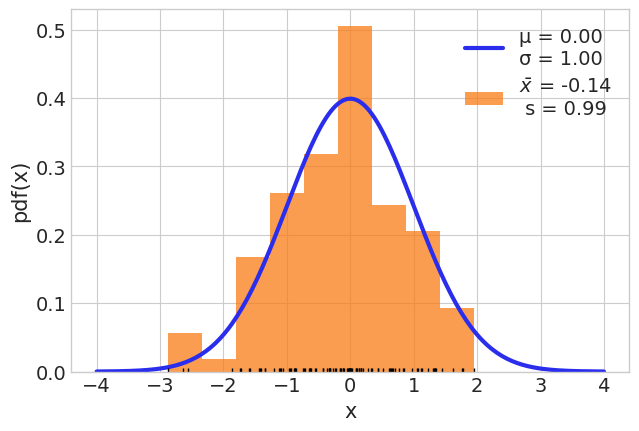

In [9]:
distri = stats.norm(loc=0, scale=1) # plot the pdf of a continuous distribution and samples from that distribution
x = np.linspace(-4, 4, 200)
x_rvs = distri.rvs(100)
x_pdf = distri.pdf(x)
mean, variance = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'μ = {mean:3.2f}\nσ = {variance**0.5:3.2f}')

plt.hist(x_rvs, bins='auto', density=True, label=f'$\\bar x$ = {x_rvs.mean():3.2f}\n s = {x_rvs.std():3.2f}', alpha=0.75)
plt.plot(x_rvs, np.zeros_like(x_rvs), 'k|')

plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend();

## Bayesian statistics

<br>

* Probability distributions allocate probabilities (credibilities) to a given set of values


* Bayesian statistics is reallocation of probability (credibility) across possibilities

## Bayes' Theorem

<br>

$$\underbrace{p(\theta \mid y)}_{posterior} = \frac{\overbrace{p(y \mid \theta)}^{\text{likelihood}} \overbrace{p(\theta)}^{prior}}{\underbrace{\color{red}{p(y)}}_{\text{marginal likelihood}}}$$
<br>

* $\theta$ represents the parameters in our model (what we want/need to learn)
* $y$ represents the data


* The central object for Bayesian statistics is the posterior distribution.


* $\color{red}{p(y) = \int_{\theta} p(y \mid \theta)p(\theta) d(\theta)}$ Generally no analytical solution or too costly --> Numerical methods to the rescue!

## Bayesian statistics in 3 steps (simplified workflow)

<br>

1. **Create a probabilistic model**. Probabilistic models are _stories_ about how the observed data is generated. The models are expressed using probability distributions.


2. **Condition the model to the observed data in order to obtain the posterior**. Using the Bayes theorem, the prior distribution is updated according to the observed data, obtaining the posterior distribution.


3. <font color = "gray"> **Criticize the fit of the generated model to the data and evaluate the consequences of the model**. </font>

## The statistics of magical coins

<br>

* We are going to model tossing a coin
    * What is the probability of gastric cancer when taking low-dose of aspirin?
    * What is the probability that people will agree on legalizing medical abortion?



* Our parameter, $\theta$, can take values in the interval [0, 1]
    * $\theta = 1 \implies$ always get heads
    * $\theta = 0 \implies$ always get tails.


* According to Bayes' theorem we need to define a likelihood and a prior:


$$p(\theta \mid y) \propto \underbrace{p(y \mid \theta)}_{\text{?}} \underbrace{p(\theta)}_{?}$$


## The beta-binomial model

<br>
<br>
Mathematical representation
$$
\theta \sim \operatorname{Beta}(\alpha, \beta) \\
y \sim \operatorname{Bin}(n=1, p=\theta)
$$


<br>

Visual representation
<img src="img/modelo_1_moneda.png" width=300>

From top to bottom, we first have the prior, then the likelihood, and finally the data. The arrows indicate how the part of the model are related the symbol $\sim$ indicates the stochastic nature of the variables.

In [10]:
def beta(α, β):
    x = np.linspace(0, 1, 130)
    beta = stats.beta(α, β)
    plt.plot(x, beta.pdf(x))
    plt.yticks([])
    plt.ylim(0, 6)

interact(beta,
         α=ipyw.FloatSlider(min=0.5, max=7, step=0.5, value=2),
         β=ipyw.FloatSlider(min=0.5, max=7, step=0.5, value=2));

interactive(children=(FloatSlider(value=2.0, description='α', max=7.0, min=0.5, step=0.5), FloatSlider(value=2…

In [11]:
def binomial(n, θ):
    bino = stats.binom(n, θ)
    plt.bar(range(n+1), bino.pmf(range(n+1)))
    plt.xticks(range(n+1))
    plt.ylim(0, 1);

interact(binomial, n=ipyw.IntSlider(min=1, max=10, value=1), θ=ipyw.FloatSlider(min=0, max=1, step=0.05, value=0.5));

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), FloatSlider(value=0.5, description='…

### The posterior

It can be shown that whenever we use a beta distribution as prior and a binomial distribution as likelihood we will obtain a posterior that will be a beta distribution with the following parameters:


<br>

$$
p(\theta \mid y) \propto \operatorname{Beta}(\alpha=\alpha_{prior} + y , \quad \beta= \beta_{prior} + N - y)
$$

<br>

When it is fulfilled that for a certain likelihood the functional form of a prior and that of the a posterior is the same, it is said that the prior is conjugated with the _likelihood_.

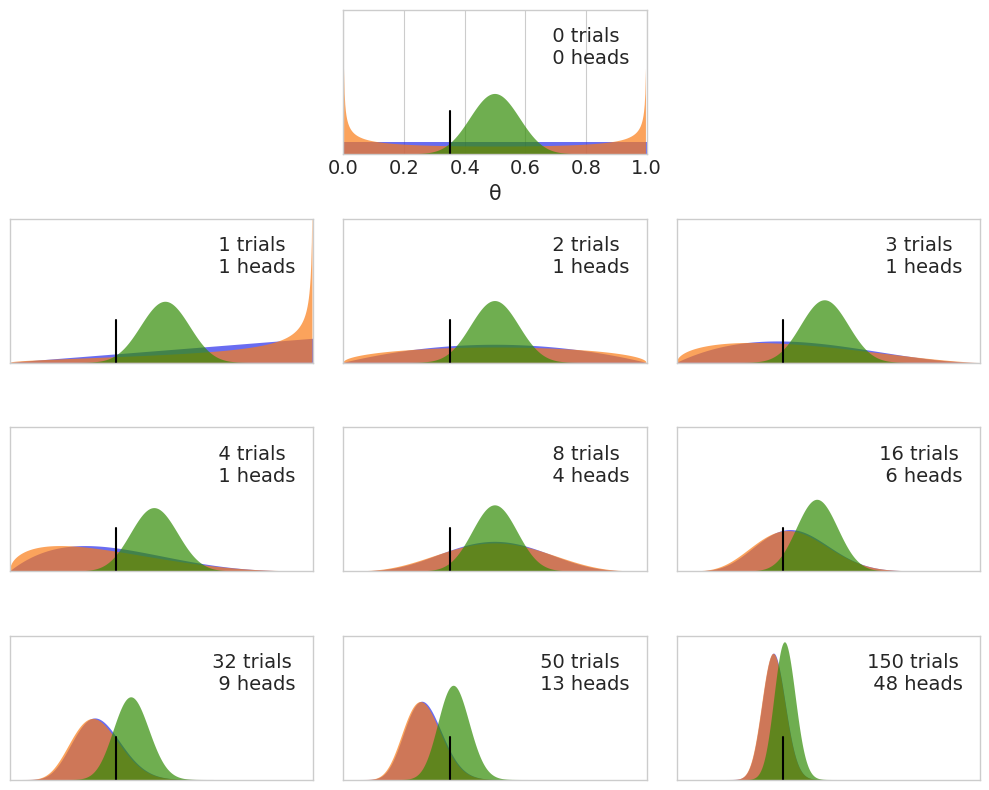

In [12]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 500)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

## Bayesian statistics in a nutshell

* Models produce data
* Models has unknown parameters
* We associate prior probability distributions to parameters
* Bayes' theorem allow us to combine data and the prior distribution
* The posterior is the joint distribution of parameters after seen the data
* Hopefully the posterior distribution will have less uncertainty than the prior distribution

# Exercises


1. De las siguientes expresiones cuales corresponden con el enunciado "la probabilidad de lluvia dado que es 25 de Mayo de 1810"?
    * p(lluvia)
    * p(lluvia | mayo)
    * p(25 de Mayo de 1810 | lluvia)
    * p(lluvia | 25 de Mayo de 1810 )
    * p(lluvia, 25 de Mayo de 1810) / p(25 de Mayo de 1810)


2. Enuncie con palabras cada una de las expresiones del punto anterior. 

3. Según la definición de probabilidad condicional
    * Cual es el valor de $P(A \mid A)$?
    * Cual es la probabilidad de $P(A, B)$?
    * Cual es la probabilidad de $P(A, B)$ en el caso especial que $A$ y $B$ sean independientes? 
    * Cuando se cumple que $P(A \mid B) = P(A)$?
    * Es posible que $P(A \mid B) > P(A)$, cuando?
    * Es posible que $P(A \mid B) < P(A)$, cuando?

4. A partir de la definición de probabilidad condicional obtenga el teorema de Bayes


6. Use la siguiente función para explorar diversas combinaciones de _priors_ y _likelihoods_. Enuncie las conclusiones que considere más relevantes.

In [13]:
def posterior_grid(grid=10, α=1, β=1, heads=6, trials=9):
    grid = np.linspace(0, 1, grid)
    prior = stats.beta(α, β).pdf(grid)
    likelihood = stats.binom.pmf(heads, trials, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title('heads = {}\ntrials = {}'.format(heads, trials))
    for i, (e, e_n) in enumerate(zip([prior, likelihood, posterior], ['prior', 'likelihood', 'posterior'])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, 'o-', label=e_n)
        ax[i].legend(fontsize=14)


interact(posterior_grid, grid=ipyw.IntSlider(min=2, max=100, step=1, value=15), α=ipyw.FloatSlider(min=1, max=7, step=1, value=1), β=ipyw.FloatSlider(
    min=1, max=7, step=1, value=1), heads=ipyw.IntSlider(min=0, max=20, step=1, value=6), trials=ipyw.IntSlider(min=0, max=20, step=1, value=9));

interactive(children=(IntSlider(value=15, description='grid', min=2), FloatSlider(value=1.0, description='α', …